In [1]:
import pennylane as qml
import numpy as np

In [2]:
dev = qml.device('default.qubit', wires = 4, shots=1)

def phase_shift(x, n):
    qml.PhaseShift(-2 * np.pi / x, wires = n)


@qml.qnode(dev)
def circuit():
    qml.SWAP(wires = [0, 3])
    qml.SWAP(wires = [1, 2])
    
    qml.Hadamard(wires = 3)
    
    qml.ctrl(phase_shift, control = 2)(4, 3)
    qml.Hadamard(wires = 2)
    
    qml.ctrl(phase_shift, control = 1)(8, 3)
    qml.ctrl(phase_shift, control = 1)(4, 2)
    qml.Hadamard(wires = 1)
    
    qml.ctrl(phase_shift, control = 0)(16, 3)
    qml.ctrl(phase_shift, control = 0)(8, 2)
    qml.ctrl(phase_shift, control = 0)(4, 1)
    qml.Hadamard(wires = 0)
    return qml.sample()

In [3]:
circuit()

tensor([0, 1, 1, 0], requires_grad=True)

2
3
2
4
3
2


/var/folders/yj/hd9lb5wn7ms2gf09wbjpmf_40000gn/T/ipykernel_16078/3581805249.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


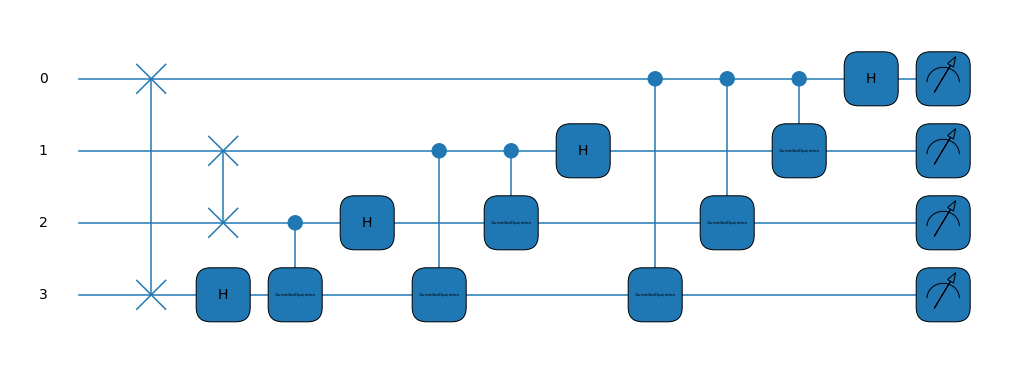

In [55]:
def phase_shift(k, n):
    qml.PhaseShift(-2 * np.pi / 2 ** k, wires = n)

@qml.qnode(dev)
def circuit():
    # Loop the SWAP gate.
    m = 0
    c = len(dev.wires) - 1
    for x in range(m, c):
        while m < c:
            qml.SWAP(wires = [m, c])
            m += 1
            c -= 1    
    
    # Redefine 'C' 
    c = len(dev.wires) - 1           
     
    # Apply Hadamard on final qubit.
    qml.Hadamard(wires = c)
    
    # Apply controlled phase shift function and Hadamards to all other qubits. 
    for y in range(c-1, -1, -1):
        k = (c - y) + 1
        for x in range(c, y, -1): 
            qml.ctrl(phase_shift, control = y)(k, x)
            k -= 1
        qml.Hadamard(wires = y)
    return qml.sample()

fig, ax = qml.draw_mpl(circuit)()
fig.show()